In [64]:
#########################
# CODE WITH MANUAL IMPLEMENTATION OF FLD(Code From Scratch)
# Classification Type : Fischer Linear Discriminant Analysis (FLD)
# DATASET :"Covid-19 Symptom Tracker(Kaggle_Sirio_Libanes_ICU_Prediction.xlsx)"
#########################

In [65]:
#########################
# Importing Basic Libraries
#########################
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import math

In [66]:
#########################
# Loading dataset
#########################
df = pd.read_excel ("E:/Codes/Jupyter/Datasets/Kaggle_Sirio_Libanes_ICU_Prediction.xlsx")
df = df.drop(['AGE_PERCENTIL'],axis = 1)
df = df.dropna()
df

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
4,0,1,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,-0.238095,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,ABOVE_12,1
6,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,1
8,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-0.880952,-1.000000,-0.906832,-0.831132,-0.940967,-0.817204,-0.882574,-1.000000,6-12,1
9,1,1,1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.142857,-0.797980,0.315690,0.200359,-0.239515,0.645161,0.139709,-0.802317,ABOVE_12,1
14,2,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.500000,-0.898990,-0.612422,-0.343258,-0.576744,-0.695341,-0.505464,-0.900129,ABOVE_12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1904,380,0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.523810,-0.717172,-0.505721,-0.119847,-0.553531,-0.245968,-0.535361,-0.717417,ABOVE_12,1
1914,382,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.500000,-0.838384,-0.513996,-0.236377,-0.617378,-0.191851,-0.498615,-0.835052,ABOVE_12,1
1919,383,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.571429,-0.838384,-0.552795,-0.585967,-0.557252,-0.573477,-0.572609,-0.838524,ABOVE_12,0
1921,384,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0


In [67]:
#########################
# Assigning String Data with Numerical Values
#########################
duration_window = {'0-2': 1,'2-4': 2,'4-6': 3,'6-12': 4,'ABOVE_12': 5}
df.WINDOW = [duration_window[item] for item in df.WINDOW]
df

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
4,0,1,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,-0.238095,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,5,1
6,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2,1
8,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-0.880952,-1.000000,-0.906832,-0.831132,-0.940967,-0.817204,-0.882574,-1.000000,4,1
9,1,1,1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.142857,-0.797980,0.315690,0.200359,-0.239515,0.645161,0.139709,-0.802317,5,1
14,2,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.500000,-0.898990,-0.612422,-0.343258,-0.576744,-0.695341,-0.505464,-0.900129,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1904,380,0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.523810,-0.717172,-0.505721,-0.119847,-0.553531,-0.245968,-0.535361,-0.717417,5,1
1914,382,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.500000,-0.838384,-0.513996,-0.236377,-0.617378,-0.191851,-0.498615,-0.835052,5,1
1919,383,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.571429,-0.838384,-0.552795,-0.585967,-0.557252,-0.573477,-0.572609,-0.838524,5,0
1921,384,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2,0


In [77]:
df['ICU'] = df['ICU'].add(1)

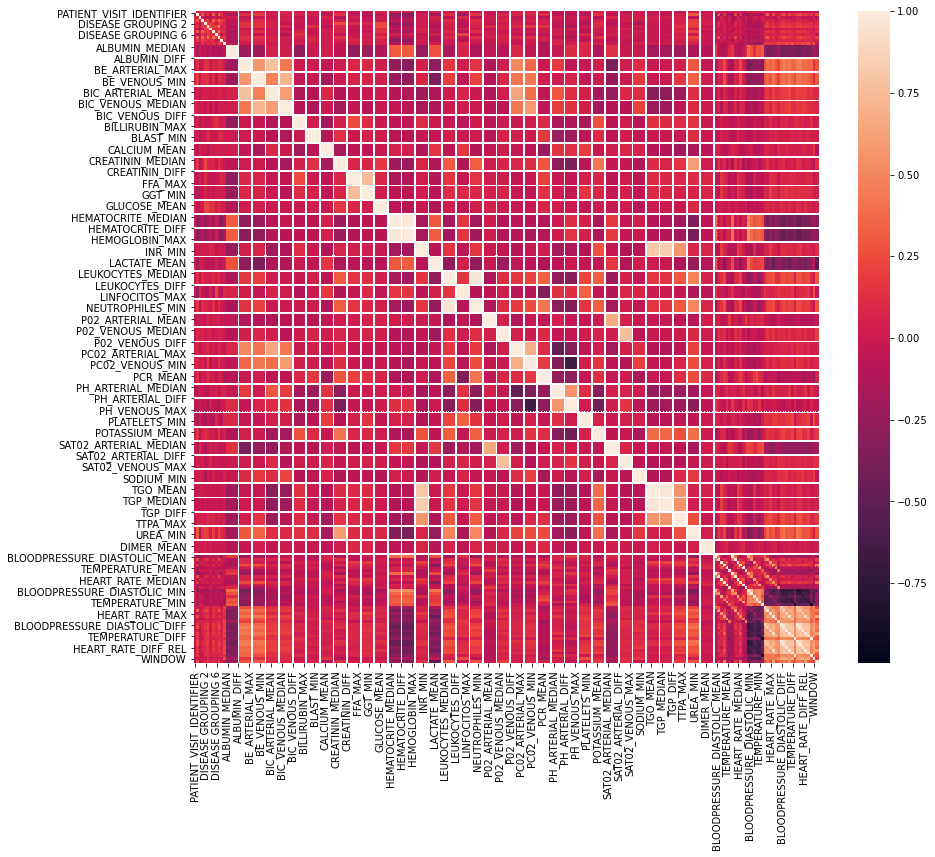

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
%matplotlib inline
fig, ax = plt.subplots(figsize=(14, 12))
sb.heatmap(df.corr())
plt.show()

In [78]:
#########################
# Allocating data Columns to variables
#########################
from sklearn.preprocessing import LabelEncoder

X = df.iloc[:, :-1].values
y = df['ICU'].values


In [79]:
#########################
# Creating Vectors based on the data
#########################
np.set_printoptions(precision=4)

mean_vectors = []
for cl in range(1,3):
    mean_vectors.append(np.mean(X[y==cl], axis=0))
    print('Mean Vector class %s: %s\n' %(cl, mean_vectors[cl-1]))

Mean Vector class 1: [ 2.0250e+02  3.4164e-01  4.1637e-01  1.2100e-01  2.1352e-02  7.4733e-02
  1.4235e-02  1.0320e-01  6.4057e-02  1.8505e-01  1.4591e-01  9.2171e-01
  5.6293e-01  5.6293e-01  5.6293e-01  5.6293e-01 -1.0000e+00 -9.9897e-01
 -9.9897e-01 -9.9897e-01 -9.9897e-01 -1.0000e+00 -9.7332e-01 -9.7332e-01
 -9.7332e-01 -9.7332e-01 -1.0000e+00 -3.1777e-01 -3.1777e-01 -3.1777e-01
 -3.1777e-01 -1.0000e+00 -3.1586e-01 -3.1586e-01 -3.1586e-01 -3.1586e-01
 -1.0000e+00 -9.4699e-01 -9.4699e-01 -9.4699e-01 -9.4699e-01 -1.0000e+00
 -1.0000e+00 -1.0000e+00 -1.0000e+00 -1.0000e+00 -1.0000e+00  3.4763e-01
  3.4763e-01  3.4763e-01  3.4763e-01 -1.0000e+00 -9.0514e-01 -9.0514e-01
 -9.0514e-01 -9.0514e-01 -1.0000e+00 -7.2039e-01 -7.2039e-01 -7.2039e-01
 -7.2039e-01 -1.0000e+00 -9.1324e-01 -9.1324e-01 -9.1324e-01 -9.1324e-01
 -1.0000e+00 -8.7517e-01 -8.7517e-01 -8.7517e-01 -8.7517e-01 -1.0000e+00
 -1.2672e-01 -1.2672e-01 -1.2672e-01 -1.2672e-01 -1.0000e+00 -1.6485e-01
 -1.6485e-01 -1.6485e-01 -1.64

In [82]:
#########################
# Creating Matrix from the above st of vecotors
#########################
S_W = np.zeros((229,229))
for cl,mv in zip(range(1,229), mean_vectors):
    class_sc_mat = np.zeros((229,229))                  # scatter matrix for every class
    for row in X[y == cl]:
        row, mv = row.reshape(229,1), mv.reshape(229,1) # make column vectors
        class_sc_mat += (row-mv).dot((row-mv).T)
    S_W += class_sc_mat                             # sum class scatter matrices
print('within-class Scatter Matrix:\n', S_W)

within-class Scatter Matrix:
 [[ 6.7607e+06 -1.0858e+02  1.9211e+03 ... -3.6145e+02 -1.5813e+03
  -3.1048e+03]
 [-1.0858e+02  1.2602e+02  1.1631e+01 ...  3.1189e+00  1.0539e+01
  -2.4424e+01]
 [ 1.9211e+03  1.1631e+01  1.2443e+02 ... -2.8334e+00 -2.0536e+00
   1.5762e+01]
 ...
 [-3.6145e+02  3.1189e+00 -2.8334e+00 ...  5.9534e+01  2.9443e+01
   1.6465e+02]
 [-1.5813e+03  1.0539e+01 -2.0536e+00 ...  2.9443e+01  8.5226e+01
   7.7805e+01]
 [-3.1048e+03 -2.4424e+01  1.5762e+01 ...  1.6465e+02  7.7805e+01
   9.5202e+02]]


In [85]:
#########################
# Calculating mean and Subtracting from each element
#########################
overall_mean = np.mean(X, axis=0)

S_B = np.zeros((229,229))
for i,mean_vec in enumerate(mean_vectors):  
    n = X[y==i+1,:].shape[0]
    mean_vec = mean_vec.reshape(229,1) # make column vector
    overall_mean = overall_mean.reshape(229,1) # make column vector
    S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)

print('between-class Scatter Matrix:\n', S_B)

between-class Scatter Matrix:
 [[ 5.7616e+04 -7.5111e+02  3.0679e+02 ... -6.8080e+02 -6.2231e+02
  -1.3826e+03]
 [-7.5111e+02  9.7919e+00 -3.9995e+00 ...  8.8753e+00  8.1128e+00
   1.8024e+01]
 [ 3.0679e+02 -3.9995e+00  1.6336e+00 ... -3.6252e+00 -3.3137e+00
  -7.3619e+00]
 ...
 [-6.8080e+02  8.8753e+00 -3.6252e+00 ...  8.0445e+00  7.3534e+00
   1.6337e+01]
 [-6.2231e+02  8.1128e+00 -3.3137e+00 ...  7.3534e+00  6.7216e+00
   1.4933e+01]
 [-1.3826e+03  1.8024e+01 -7.3619e+00 ...  1.6337e+01  1.4933e+01
   3.3176e+01]]


In [89]:
#########################
# Calculating Eigenvalues of the Vectors
#########################
eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

for i in range(len(eig_vals)):
    eigvec_sc = eig_vecs[:,i].reshape(229,1)   
    print('\nEigenvector {}: \n{}'.format(i+1, eigvec_sc.real))
    print('Eigenvalue {:}: {:.2e}'.format(i+1, eig_vals[i].real))

LinAlgError: Singular matrix

In [ ]:
#########################
# Creating Assertion for array
#########################
for i in range(len(eig_vals)):
    eigv = eig_vecs[:,i].reshape(30,1)
    np.testing.assert_array_almost_equal(np.linalg.inv(S_W).dot(S_B).dot(eigv),
                                         eig_vals[i] * eigv,
                                         decimal=6, err_msg='', verbose=True)
print('ok')

In [ ]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues

print('Eigenvalues in decreasing order:\n')
for i in eig_pairs:
    print(i[0])

In [ ]:
#########################
# Calculating Variances in the above obtained Eigenvalues
#########################
print('Variance explained:\n')
eigv_sum = sum(eig_vals)
for i,j in enumerate(eig_pairs):
    print('eigenvalue {0:}: {1:.2%}'.format(i+1, (j[0]/eigv_sum).real))

In [ ]:
#########################
# Making matrix from the obtained Variance in Eigenvectors
#########################
W = np.hstack((eig_pairs[0][1].reshape(30,1), eig_pairs[1][1].reshape(30,1)))
print('Matrix W:\n', W.real)

In [ ]:
X_lda = X.dot(W)
assert X_lda.shape == (569,2), "The matrix is not 150x2 dimensional."

In [ ]:
#########################
# Scatter Ploting the Data
#########################
from matplotlib import pyplot as plt

def plot_step_lda():

    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(1,3),('^', 's'),('blue', 'red')):

        plt.scatter(x=X_lda[:,0].real[y == label],
                y=X_lda[:,1].real[y == label],
                marker=marker,
                color=color,
                alpha=0.5,
                label=label_dict[label]
                )

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title('LDA: Iris projection onto the first 2 linear discriminants')

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.tight_layout
    plt.show()

plot_step_lda()